In [72]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors 
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier 
from sklearn.decomposition import PCA
from sklearn import svm 
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [14]:
df_titanic = read_csv("train.csv")
df_titanic.set_index("PassengerId", inplace=True) # set PassengerId as index of table, can reset_index to revert

In [3]:
df_test = read_csv("test.csv")
df_test.set_index("PassengerId", inplace=True)

In [10]:
set(df_titanic["Embarked"])


{nan, 'C', 'Q', 'S'}

In [15]:
# data cleaning

df_titanic['Gender'] = df_titanic['Sex'].map( {'female': 0, 'male': 1} ).astype(int) # map to binary

print df_titanic.describe() # gives descriptive statistics of all columns


print set(df_titanic["Pclass"])

         Survived      Pclass         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208   
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429   
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400   
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200   
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000   
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200   

           Gender  
count  891.000000  
mean     0.647587  
std      0.477990  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  
set([1, 2, 3])


In [16]:
df_titanic['FixedEmbarked'] = df_titanic['Embarked']
#df_titanic['FixedEmbarked'].fillna(-1)
df_titanic.loc[df_titanic['Embarked'].isnull(),'FixedEmbarked']=-1
df_titanic.loc[df_titanic['Embarked']=='S', 'FixedEmbarked']=0
df_titanic.loc[df_titanic['Embarked']=='C', 'FixedEmbarked']=1
df_titanic.loc[df_titanic['Embarked']=='Q', 'FixedEmbarked']=2

#df_titanic['FixedEmbarked'] = df_titanic['FixedEmbarked'].map( {'S': 0, 'C': 1, 'Q':2} ).astype(float) # map to binary

set(df_titanic['FixedEmbarked'])


{-1, 0, 1, 2}

In [17]:

gender_class_age_mean = np.zeros((2,3))
gender_class_age_median = np.zeros((2,3))

print set(df_titanic["Pclass"])

# get mean and median of each class&gender group
for gender in set(df_titanic["Gender"]):
    for pclass in set(df_titanic["Pclass"]):

        gender_class_age_median[gender,pclass-1] = \
        df_titanic[(df_titanic["Gender"]==gender) & (df_titanic["Pclass"]==pclass)]["Age"].dropna().median()
        
        gender_class_age_mean[gender,pclass-1] = \
        df_titanic[(df_titanic["Gender"]==gender) & (df_titanic["Pclass"]==pclass)]["Age"].dropna().mean()

print set(df_titanic["Pclass"])


set([1, 2, 3])
set([1, 2, 3])


In [21]:
df_titanic['FixedAge_Mean'] = df_titanic['Age']
df_titanic['FixedAge_Median'] = df_titanic['Age']

print set(df_titanic["Pclass"])

for gender in set(df_titanic["Gender"]):
    for pclass in set(df_titanic["Pclass"]):
        print gender, pclass-1
        df_titanic.loc[(df_titanic['FixedAge_Mean'].isnull()==True) & \
                   (df_titanic["Pclass"]==pclass) & (df_titanic["Gender"]==gender),'FixedAge_Mean'] = gender_class_age_mean[gender, pclass-1]
        df_titanic.loc[(df_titanic['FixedAge_Median'].isnull()==True) & \
                   (df_titanic["Pclass"]==pclass) & (df_titanic["Gender"]==gender),'FixedAge_Median'] = gender_class_age_median[gender, pclass-1]

print df_titanic["FixedAge_Median"].dtypes
print df_titanic["FixedAge_Median"].count() == df_titanic["FixedAge_Median"].dropna().count()

set([1, 2, 3])
0 0
0 1
0 2
1 0
1 1
1 2
float64
True


In [22]:
print df_titanic.describe()

         Survived      Pclass         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208   
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429   
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400   
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200   
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000   
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200   

           Gender  FixedAge_Mean  FixedAge_Median  
count  891.000000     891.000000       891.000000  
mean     0.647587      29.318643        29.112424  
std      0.477990      13.281103        13.304424  
min      0.000000       0.420000         0.420000  
25%      0

In [23]:
df_titanic.ix[1] # call row number and not index (since we changed index)

Survived                                 0
Pclass                                   3
Name               Braund, Mr. Owen Harris
Sex                                   male
Age                                     22
SibSp                                    1
Parch                                    0
Ticket                           A/5 21171
Fare                                  7.25
Cabin                                  NaN
Embarked                                 S
Gender                                   1
FixedEmbarked                            0
FixedAge_Mean                           22
FixedAge_Median                         22
Name: 1, dtype: object

In [24]:
# "pivot tables" for python, groupby
df_titanic.sort(["Gender", "Pclass", "FixedAge_Median", "Survived"], ascending=True, inplace=True)
by_sex = df_titanic.groupby("Gender") # group by sex
print by_sex.mean()

by_class = df_titanic.groupby("Pclass")
print by_class["Survived", "Gender"].mean()

by_all = df_titanic.groupby(["Gender", "Pclass"])
print by_all["Survived","Age"].mean() # this shows us the mean age and survival rate for groupby Sex, Pclass

        Survived    Pclass        Age     SibSp     Parch       Fare  \
Gender                                                                 
0       0.742038  2.159236  27.915709  0.694268  0.649682  44.479818   
1       0.188908  2.389948  30.726645  0.429809  0.235702  25.523893   

        FixedAge_Mean  FixedAge_Median  
Gender                                  
0           27.288063        27.261146  
1           30.423672        30.119879  
        Survived    Gender
Pclass                    
1       0.629630  0.564815
2       0.472826  0.586957
3       0.242363  0.706721
               Survived        Age
Gender Pclass                     
0      1       0.968085  34.611765
       2       0.921053  28.722973
       3       0.500000  21.750000
1      1       0.368852  41.281386
       2       0.157407  30.740707
       3       0.135447  26.507589


0.718553459119
0.669811320755
0.705974842767
0.699685534591
0.781446540881
0.781446540881
0.781446540881
0.781446540881
0.781446540881
0.781446540881
0.781446540881
0.781446540881
0.781446540881
0.781446540881
0.787735849057
0.787735849057
0.787735849057
0.781446540881
0.781446540881
0.781446540881
0.781446540881
0.781446540881
0.781446540881
0.745283018868
0.745283018868


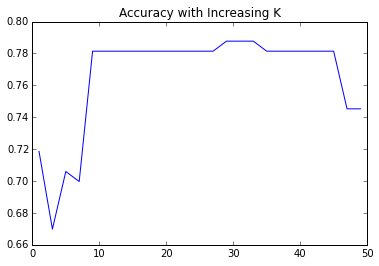

In [67]:
# knn at different n's

results = []
columns = ["Pclass",  "Gender"]

# randomly select rows for test/train
test_idx = np.random.uniform(0, 1, len(df_titanic)) <= 0.3
train = df_titanic[test_idx==True]
test = df_titanic[test_idx==False]

for n in range(1,51,2):
    knn = neighbors.KNeighborsClassifier(n_neighbors = n)
    print knn.fit(train[columns], train["Survived"]).score(test[columns], test["Survived"])
    predicted = knn.predict(test[columns].dropna())
    accuracy = np.where(predicted==test['Survived'], 1, 0).sum() / float(len(test))
    #print "Neighbors: %d, Accuracy: %3f" % (n, accuracy)
    results.append([n, accuracy])
    if n==20:
        predicted_knn, test_knn = predicted, test['Survived']
 
results = pd.DataFrame(results, columns=["n", "accuracy"])
 
plt.plot(results.n, results.accuracy)
plt.title("Accuracy with Increasing K")
plt.show()



In [70]:
# random forest classifier
columns = ["Pclass",  "Gender"]

# randomly select rows for test/train
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df_titanic[columns], \
                                                                     df_titanic["Survived"], \
                                                                     test_size=0.4, random_state=0)

clf = RandomForestClassifier(n_jobs=2)
clf.fit(X_train, y_train)
print clf.score(X_test, y_test)
 
# show how predictions of survival fare against actual survival    
predictions = clf.predict(X_test)
pd.crosstab(y_test, predictions, rownames=['actual'], colnames=['preds'])


0.78431372549


preds,0,1
actual,,
0,215,3
1,74,65


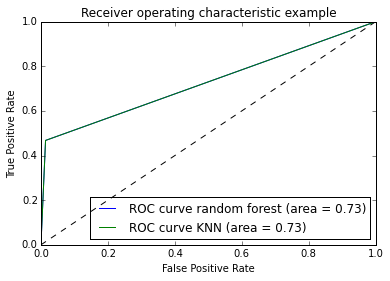

In [71]:
fpr, tpr, thresholds  = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve random forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

fpr, tpr, thresholds  = roc_curve(test_knn, predicted_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve KNN (area = %0.2f)' % roc_auc)

plt.legend(loc="lower right")



In [43]:
# pca practice
results = []
columns = ["Pclass",  "Gender", "FixedAge_Median", "FixedAge_Mean", "Fare", "SibSp", "FixedEmbarked", "Parch"]

# randomly select rows for test/train
test_idx = np.random.uniform(0, 1, len(df_titanic)) <= 0.3
train = df_titanic[test_idx==True]
test = df_titanic[test_idx==False]

# which components are useful?
# seems almost all - maybe except Parch
pca = PCA()
pca_ft = pca.fit(train[columns])

print(pca.explained_variance_) 

pca.n_components = 7
X_reduced = pca.fit_transform(train[columns])
X_reduced.shape

[  2.88134900e+03   3.16482116e+02   8.07017306e-01   4.43008847e-01
   3.64025242e-01   3.43059831e-01   1.84662389e-01   1.02729797e-01]


(240, 7)

In [58]:
# SVM analysis

results = []
columns = ["Pclass",  "Gender"]

X_train, X_test, y_train, y_test = cross_validation.train_test_split(df_titanic[columns], \
                                                                     df_titanic["Survived"], \
                                                                     test_size=0.4, random_state=0)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print clf.score(X_test, y_test)
predictions = clf.predict(X_test)

pd.crosstab(test['Survived'], predictions, rownames=['actual'], colnames=['preds'])


0.823529411765


preds,0,1
actual,,
0,317,55
1,75,163
